## Importing Required libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd #to work with CSV files

#matplotlib imports are used to plot confusion matrix for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words

#pre-processing of text
import string
import re

#import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#import different metrices to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

#import time fuunction from time module to track the training duration
from time import time

## Data Sanity Check

In [ ]:
our_data = pd.read_csv("/content/drive/MyDrive/PROJECTS DATABASE/spam.csv", encoding = "ISO-8859-1")

In [ ]:
our_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
our_data = our_data[['v1', 'v2']] #Choosing only relevant columns for our dataframe
our_data.shape

(5572, 2)

In [ ]:
#Finding duplicates
our_data.duplicated().sum()

403

In [ ]:
#dropping duplicates

our_data = our_data.drop_duplicates(keep = 'first')

In [ ]:
our_data.shape

(5169, 2)

In [ ]:
# Rename the columns in the DataFrame
our_data = our_data.rename(columns={'v1': 'classification', 'v2': 'email'})


## Analysing the data

In [ ]:
our_data['classification'].value_counts()

ham     4516
spam     653
Name: classification, dtype: int64

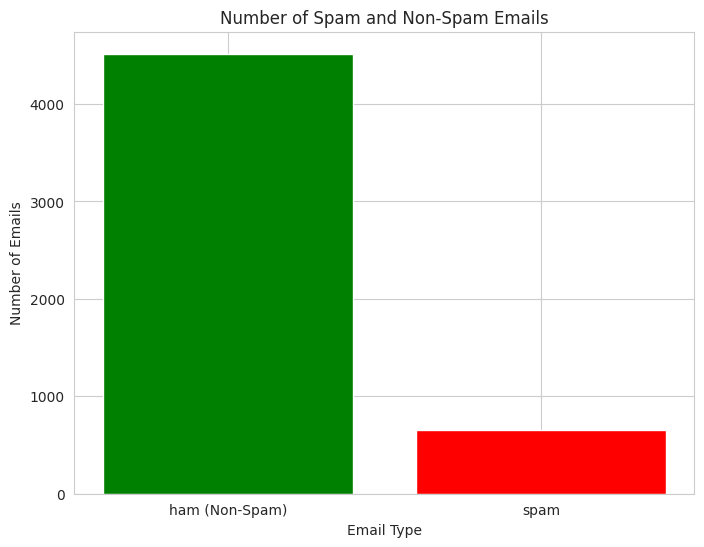

In [ ]:
# Count the number of spam and non-spam emails in the data set
spam_counts = our_data['classification'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()

In [ ]:
#Labelling the target variable
our_data['classification'] = our_data.classification.map({'spam':1, 'ham':0}) #spam is 1 not-spam is 0


## Text Cleaning
Typical steps involve tokenization, lower casing, removing, stop words, punctuation markers etc, and vectorization. Other processes such as stemming/lemmatization can also be performed. Here, we are performing the following steps: removing br tags, punctuation, numbers, and stopwords. While we are using sklearn's list of stopwords, there are several other stop word lists (e.g., from NLTK) or sometimes, custom stopword lists are needed depending on the task.

In [ ]:
from nltk.stem import WordNetLemmatizer
import spacy
nlp = spacy.load('en_core_web_sm')

stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [ ]:
#Separating the target and features
X = our_data["email"]
y = our_data["classification"]

print(X.shape, y.shape)

(5169,) (5169,)


## Modelling
Now we are ready for the modeling. We are going to use algorithms from sklearn package. We will go through the following steps:

1. Split the data into training and test sets (80% train, 20% test)
2. Extract features from the training data using CountVectorizer.
3. Transform the test data into the same feature vector as the training data.
4. Train the classifier
5. Evaluate the classifier

In [ ]:
#Step 1: train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4135,) (4135,)
(1034,) (1034,)


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Step 2: Vectorisation
vect = CountVectorizer(preprocessor=clean) #instantiate a vectorizer
X_train_dtm = vect.fit_transform(X_train) #use it to extract features from training data
#Step 3: transform test data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(4135, 6451) (1034, 6451)


### Multinomial Naive Bayes

In [ ]:
mnb = MultinomialNB()
%time mnb.fit(X_train_dtm, y_train)

y_pred_train = mnb.predict(X_train_dtm)
y_pred_test = mnb.predict(X_test_dtm)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 3.3 ms, sys: 993 µs, total: 4.29 ms
Wall time: 9.86 ms

Training Accuracy score: 0.992503022974607
Testing Accuracy score: 0.9690522243713733


In [ ]:
# Get classification reports for train and test sets
train_classification_report = classification_report(y_train, y_pred_train)
test_classification_report = classification_report(y_test, y_pred_test)


# Print classification reports side by side
print("Train Classification Report:\n", train_classification_report)
print("\nTest Classification Report:\n", test_classification_report)

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3617
           1       0.97      0.97      0.97       518

    accuracy                           0.99      4135
   macro avg       0.98      0.98      0.98      4135
weighted avg       0.99      0.99      0.99      4135


Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       899
           1       0.91      0.85      0.88       135

    accuracy                           0.97      1034
   macro avg       0.94      0.92      0.93      1034
weighted avg       0.97      0.97      0.97      1034



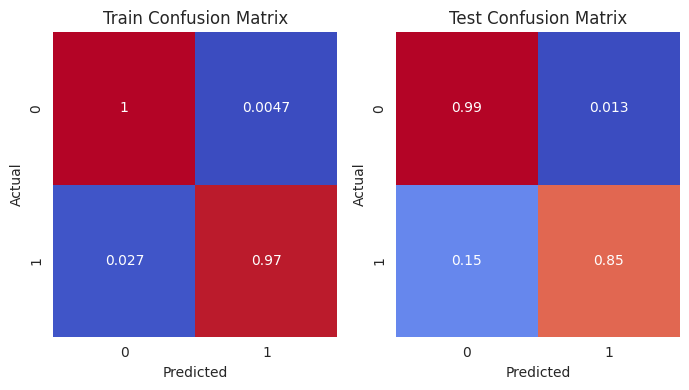

In [ ]:
# Calculate confusion matrices for train and test sets
train_cm = confusion_matrix(y_train, y_pred_train, normalize='true')
test_cm = confusion_matrix(y_test, y_pred_test, normalize = 'true')

# Plot the confusion matrices side by side
plt.figure(figsize=(7,4))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, cmap="coolwarm", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, cmap="coolwarm", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

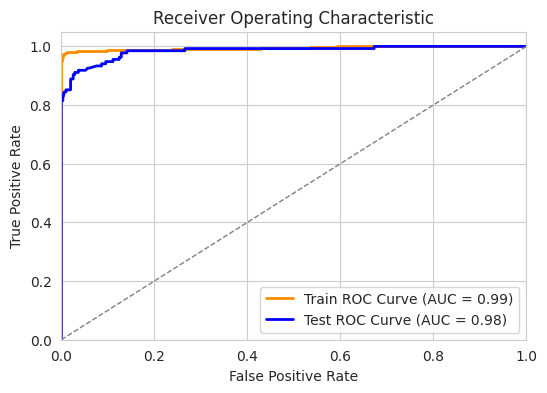

In [ ]:
# Get predicted probabilities for both train and test sets
train_probs = mnb.predict_proba(X_train_dtm)[:, 1]
test_probs = mnb.predict_proba(X_test_dtm)[:, 1]

# Calculate ROC curve for both train and test sets
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calculate AUC (Area Under the Curve) for both train and test ROC curves
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curves side by side
plt.figure(figsize=(6,4))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Multinomial Naive Bayes performs well with the test data with 97% accuracy.

## Predicting emails

In [ ]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',vect),
    ('nb',mnb)
])

__Here using mix of spam and non-spam email examples to test the functioning of model.__

In [ ]:
emails=[
       "You're cordially invited to our charity fundraising event next weekend. Your support means a lot to us, and we hope to see you there.",
       "Hello, this is a reminder of our team meeting tomorrow at 10 AM in the conference room. Please be on time.",
       "Please verify your account information immediately by clicking on the link. Failure to do so will result in account suspension."
]

In [ ]:
clf.predict(emails)

array([0, 0, 1])